In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('housing_cleaned.csv')
df2 = pd.read_csv('housing_cleaned.csv')

In [16]:
df2 = df2[df2["Size(sqft)"].str.contains("N/A") == False]
df2 = df2[df2["Size(sqft)"].str.contains("Limited") == False]
df2= df2[df2["Bedrooms"].str.contains("5+") == False]
df = df[df["Bedrooms"].str.contains("5+") == False]
df2['Bedrooms'] = df2["Bedrooms"].astype(float)
df2['Bathrooms'] = df2["Bathrooms"].astype(float)
df['Bedrooms'] = df["Bedrooms"].astype(float)
df['Bathrooms'] = df["Bathrooms"].astype(float)
df2['Size(sqft)'] = df2["Size(sqft)"].astype(float)

In [17]:
status = pd.get_dummies(df2['Location'], dtype = int)
status3 = pd.get_dummies(df2['Style'], dtype = int)

df2 = pd.concat([df2, status, status3,], axis = 1)

df2.drop(columns='Location',inplace=True)
df2.drop(columns='Den',inplace=True)
df2.drop(columns='Bachelor/Studio',inplace=True)
df2.drop(columns='Style',inplace=True)
df2.drop(columns='Air Conditioned  ',inplace=True)
df2.drop(columns = 'Title', inplace = True)

In [45]:
#Choose relevant columns
df2 = df2[df2['Size(sqft)'] > 50]
df2 = df2[df2['Size(sqft)'] < 3600]

In [19]:
df_model = df2

#Get dummy data
df_dum = pd.get_dummies(df_model, dtype = int)

In [54]:
#Train test split
X = df_dum.drop('Price', axis =1)
y = df_dum['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Price')

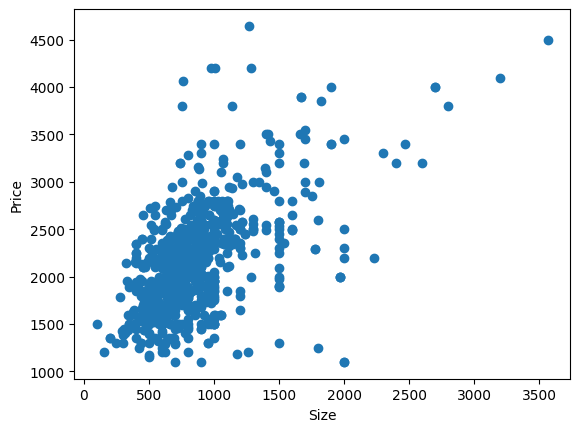

In [44]:
plt.scatter(x = df2['Size(sqft)'], y = df2['Price'])
plt.xlabel('Size')
plt.ylabel('Price')

In [55]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predicitions = model.predict(X_test)
model.score(X_test, y_test)

0.5960492085152636

In [68]:

y_test[:10]

890     1700
1182    2500
384      700
801     1685
211     2225
1135    2373
1181    2600
107     1850
345     1950
785     1440
Name: Price, dtype: int64

In [69]:
model.predict(X_test[:10])

array([2129.15822839, 2573.23633515, 2359.82396966, 1747.91472358,
       2010.28680856, 2303.89774283, 2598.13633942, 1846.61629285,
       1905.17976489, 1463.89943337])

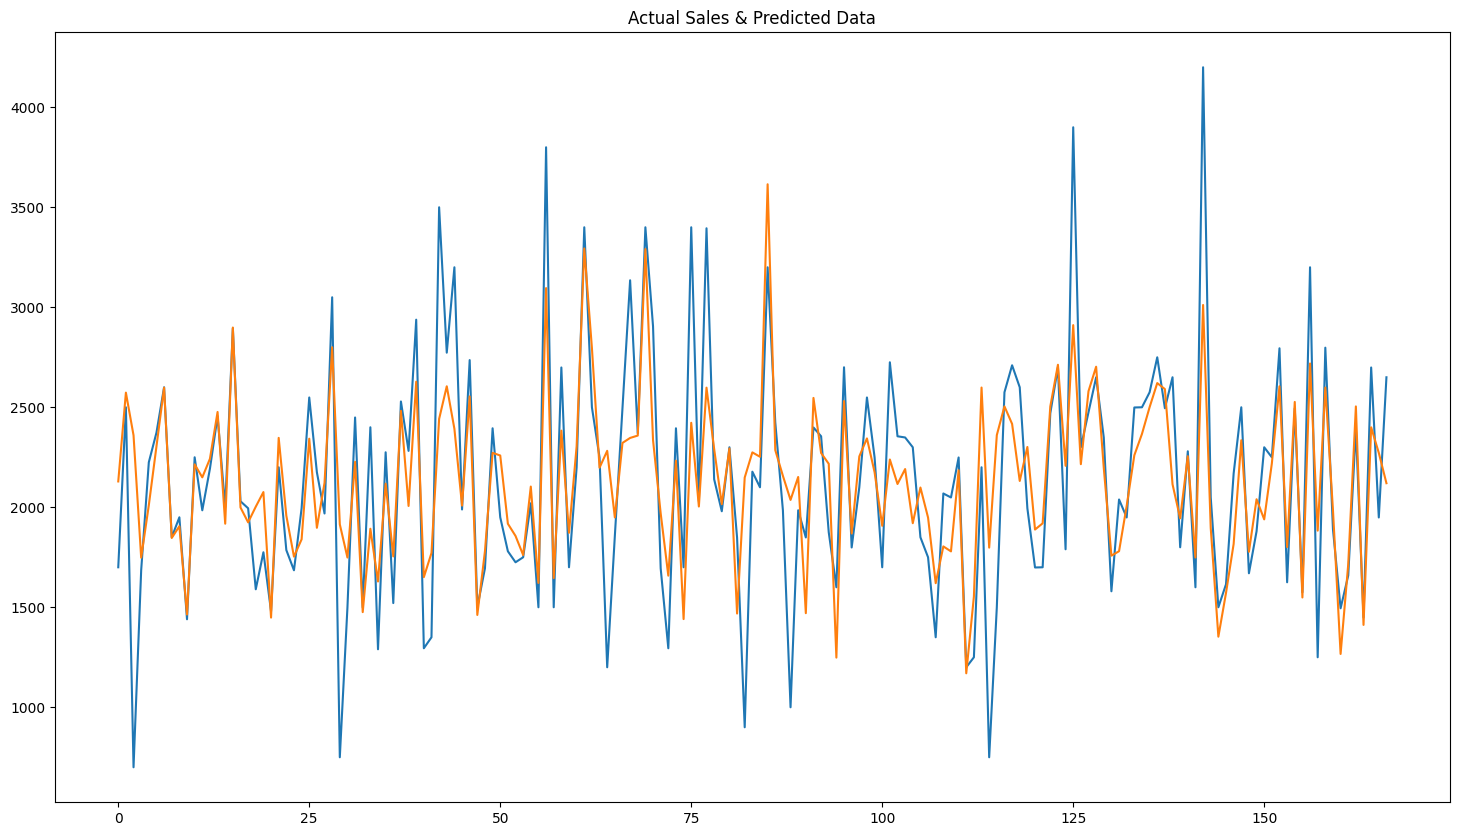

In [70]:
plt.figure(figsize=(18,10))
x_ax = range(len(y_test)) 
plt.plot(x_ax, y_test, label = "original")
plt.plot(x_ax, predicitions, label = "predicted")
plt.title("Actual Sales & Predicted Data")
plt.legend
plt.show()